# The Multi-Layered Perceptron

![Multi layered perceptron](https://upload.wikimedia.org/wikipedia/commons/c/c2/MultiLayerNeuralNetworkBigger_english.png)

### Part 1 - What is a multilayer Neural Network
- 3.1.1 - An introduction to Multilayer Neural Networks
- 3.1.2 - The Hidden-Layer (An example using the binary `xor` operator)


### Part 2 - Let's make a prediction
- 3.2.1 - Make a prediction step by step 
    - 3.2.1.1 - Define the values fed forward as `inputs`.
    - 3.2.1.2 - Define the multiplier factors as `weights0` and `weights1`
    - 3.2.1.3 - Calculate the product $(inputs \cdot weights0)$ as `sum_synapse0`
    - 3.2.1.4 - Calculate the `sigmoid(sum_synapse0)` as the `hidden_layer`
    - 3.2.1.5 - Calculate the hidden_layer * weights1 as the `sum_synpase1`
    - 3.2.1.6 - Calculate the predictions of `sigmoid(sum_synpase1)` as the `output_layer`
    

### Recap
**Checkpoint reached** Let's have a manual walkthrough 

### Part 3
- 3.3.1 - Improving on predictions
    - 3.3.1.0 - Theory of cost, deltas, Weights adjustment with gradient descent and backpropagation
    - 3.3.1.1 - Calculate the `error_output_layer`(error, cost & loss functions)
    - 3.3.1.2 - Calculate the partial derivatives (`sigmoid_derivative` functions)
    - 3.3.1.3 - Calculate the `delta_output`
    - 3.3.1.4 - Transpose `weights1` to enable a `delta_output_weight_multiplier`
    - 3.3.1.5 - Calculate the `delta_output_weights_multiplier`
    - 3.3.1.6 - Calculate the `hidden_layer_deltas` # 3.3.1 - Improving on predictions

### Part 4 - Backpropagation of new weights values
- 3.4.1 - Application of Backpropagation 

### Part 5 - Implement Multilayer Perceptron in Python
- 3.5.1 - Full solution

# Part 1

# 3.1.1 - An introduction to Multilayer Neural Networks

#### Q: What is a Multi-layer Neural network?
**A:** In the depiction at the top of the workbook we can see the main concepts of a multilayer perceptron. The most basic principles are: 

- **There is at least 1 hidden layer**. 
- Each neuron in the hidden layer should have its own `sum function` & `activation function`. 
- The elements are all connected! Which means in the case of the first hidden layer that each neuron is connected to each of the inputs. In the case of subsequent hidden layers each neuron is connected to each neuron of the preceding layer, again each having its own `sum function` and `activation function`.  
- Our structure will conclude with an output layer. This is fed the results of each of the neurons in the final hidden layer and **this result is the prediction** of our neural network. 
- This `prediction` is evaluated and we adjust the weights to see if we determine a better outcome. Each iteration of this cycle is called an `epoch`. 

#### Q: What is an epoch and why do we set an epochs limit?
**A:** We set the epochs limit to control the amount of times we'll allow the algorithm to run. Epoch thresholds are used to prevent infinite loops in search of a perfect prediction because in a lot of cases in machine learning we will not achieve a 100% perfect algorithm. I guess we can take some clues from the fact we use ML to make `predictions` of outcomes rather than determine factual outcomes.

#### Q: What is a `sum function`?
**A:** The `sum function` is the result of multiplying an input value by the associated weight. In a single layer perceptron that means, a single sum and activation function for the inputs. In a multilayer perceptron where we can have `_n_ layers` that means the sum can be made of the multiplier by the inputs and the weights in the case of the first hidden layer and for subsequent layers it can be the sum of the neuron in that preceding layer multiplied by another weight between hidden layers.   
#### Q: What is an `activation function`?
**A:** The `activation function` is the decision fork of evaluating a sum and deciding if that neuron is fired or not. In the single layer perceptron we seen a `step function` type of activation function. A step can have values of `0` or `1`. Another type of activation function is the `sigmoid function`. What is different here is that the result or activation can be between `0` and `1` and not stepped. That ability to touch all points between `0` and `1` means we need to work out exactly where on the line that value belongs. 
  
#### Q: What if I need to return negative values?  
**A:** If we need to return negative values we can use the `hyperbolic tangent function` which looks like this: $y = \frac{e^{x} - e^{-x} }{e^{x} + e^{-x}}$ evaluating the equation asks to replace the `x` with the value under evaluation and the return will be graded between `-1` & `1`. 

#### Q: Any additional information worth remembering?
**A:** The irrational number `e` is also known as `Euler’s number`. It is approximately 2.718281, and is the base of the natural logarithm, ln (this means that, if $x = l_n y = \log_e y$, then $e^x = y$. In a `sigmoid function` We apply the following equation: $y = \frac{1}{1 + e^{-x}}$ to determine:
- if `x` is high, the value lies closer to, or equal to 1. 
- if `x` is low , the value lies closer to, or equal to 0.  

# 3.1.2 - The Hidden-Layer (An example using the binary `xor` operator)

![](https://static.javatpoint.com/tutorial/coa/images/logic-gates5.png)

We will use the 'XOR' operator as our case for the multi-layer study. The following truth table used as reference. We will focus on the `feed-forward` process from the input layer to the hidden layer. We can declare the following upfront: 
- We have 2 inputs (x,y) as we have had all along.
- We have 3 neurons in our hidden layer, with individual sum and activation functions, of course. 

# Part 2

For additional information on the `sigmoid` function see [here](https://en.wikipedia.org/wiki/Sigmoid_function)

# 3.2.1 - Make a prediction step by step

### Determining a process

- 3.2.1.0 - Imports and Setup
- 3.2.1.1 - Define the inputs, outputs (feed forward values)
- 3.2.1.2 - Define the multiplier factors as `weights0` & `weights1`
- 3.2.1.3 - Calculate the product $(inputs \cdot weights0)$ as `sum_synapse0`
- 3.2.1.4 - Calculate the `sigmoid(sum_synapse0)` as the `hidden_layer` 
- 3.2.1.5 - Calculate the hidden_layer * weights1 as the `sum_synpase1`
- 3.2.1.6 - Calculate the predictions of `sigmoid(sum_synpase1)` as the `output_layer` or `prediction`

## 3.2.1.0 - Imports, Setup & Utility functions

In [36]:
# handle the imports 
import numpy as np

In [37]:
# definition of a sigmoid function. 
def sigmoid(sum):
    return 1 / (1 + np.exp(-sum))

In [38]:
# define the learning rate
learning_rate = 0.3

## 3.2.1.1 - Define the inputs, outputs (feed forward values)

In [39]:
# create the inputs data 
input_layer = np.array([[0,0], [0,1], [1,0], [1,1]])
input_layer.shape

(4, 2)

In [40]:
expected_outputs = np.array([[0], [1], [1], [0]])
expected_outputs.shape

(4, 1)

## 3.2.1.2 - Define the multiplier factors as `weights0` and `weights1`

In [41]:
# weights0 
# These are the input-X weights & input-Y weights respectively 
# they are the weights used in the sum function to generate a 
# product value. 
weights0 = np.array([[-0.424, -0.740, -0.961], 
                     [0.358, -0.577, -0.469]])


# weights1 
# these are hardcoded in the class lecture of this example. 
# They are the weights we see used between the hidden layer
# and the output layer at the end of our operation. The 
# figures used are for demonstration purposes so don't get 
# hung up on what these particular numbers mean. They are 
# just demo weights. 
weights1 = np.array([[-0.017], 
                     [-0.893], 
                     [0.148]])

In [42]:
# set the epochs limit.
epochs = 100

## 3.2.1.3 - Calculate the product $(inputs \cdot weights0)$ as `sum_synapse0`

In [43]:
# starts the sum of the communication between the input layer and the 
# hidden layer. This is basically a matrix multiplication exercise. 
# Creating the results of: 
#     "for each input_layer * each weights0"  
# Note: using the np.dot is more optimised than using a for loop.

# sum_synapse0 is what we called product above the name sum_synapse0 
# is more descriptive because it is the sum of the synapse at level 0
# which is the first layer, or the input to hidden layer. 
sum_synapse0 = np.dot(input_layer, weights0)
sum_synapse0  

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.358, -0.577, -0.469],
       [-0.424, -0.74 , -0.961],
       [-0.066, -1.317, -1.43 ]])

## 3.2.1.4 - Calculate the `sigmoid(sum_synapse0)` as the `hidden_layer`

In [44]:
# calculates the hidden layer values, these are the values
# returned from the sigmoid of the sum_synapse0

hidden_layer = sigmoid(sum_synapse0)
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

## 3.2.1.5 - Calculate the hidden_layer * weights1 as the `sum_synpase1`

In [45]:
# create the sum_synapse1 values. These are the values that 
# are generated from the hidden layer to the output layer 
# and are considered as the final results of the neural 
# network for each of the items in our dataset. 
sum_synapse1 = np.dot(hidden_layer, weights1)
sum_synapse1

array([[-0.381     ],
       [-0.27419072],
       [-0.25421887],
       [-0.16834784]])

## 3.2.1.6 - Calculate the predictions of `sigmoid(sum_synpase1)` as the `output_layer`

In [46]:
# We create the output layer or as it's often called the prediction of the
# neural network by applying the sigmoid to the sum_synapse1 value. 
output_layer  = sigmoid(sum_synapse1)

print("Neural net Prediction\t\tRounded")
print("-" * 40)
for i in range(len(output_layer)):
    print(f"{float(output_layer[i])}\t\t{round(float(output_layer[i]))}")


Neural net Prediction		Rounded
----------------------------------------
0.40588573188433286		0
0.43187856951314224		0
0.43678536461116163		0
0.4580121591884929		0


Now we have the results of the `sigmoid` from applying the inputs and weights we apply the `sum function` and `activation function` again to achieve the `sum_synapse1` or outputs and the `sigmoid(output)` will give us the neural network's prediction. Let's work through a manual calculation process to increase our comprehension before adding more complexity to our python implementation.

<center><img src="https://drive.google.com/uc?export=view&id=1wfrCqtzef-qBymeaeIApeI_9VlxlbV0E" alt="I predict" width="600" height="400"></center>
<br>


<h1><center><i>We made a prediction!</i></center></h1>

# LET'S HAVE A RECAP

#### Manual calculation of output results

There's a lot to this process so let's see a timeline of the steps up until now, from input to prediction. This is effectively one iteration of our network's capability.

In [152]:
def define_step(stepname):
    print(f"\n[Step Definition] {stepname}")

In [166]:
# functionised the descriptor of the process up until this point.
# func accepts the index of the instance
def processing_description(i_idx):

    define_step("Inputs Passing")
    input1 = input_layer[i_idx][0]
    input2 = input_layer[i_idx][1]
    print(f"\t[001.001] Input1: {input1}")
    print(f"\t[001.002] Input2: {input2}")

    define_step("weights0 application")
    for n_idx in range(3):
        in1_calc = f"({input1} * {weights0[:,n_idx][0]})"
        in2_calc = f"({input2} * {weights0[:,n_idx][1]})"
        calc = sum_synapse0[i_idx][n_idx]
        print(f"\t[002.00{n_idx}] sum function for neuron{n_idx}: {in1_calc} + {in2_calc} = {calc}")

    define_step("Apply sigmoid to get activation function values")
    for n_idx in range(3):
        sum_desc = f"sigmoid({sum_synapse0[i_idx][n_idx]})"
        sum_val = hidden_layer[i_idx][n_idx]
        print(f"\t[003.00{n_idx}] Activation value neuron{n_idx}: {sum_desc} = {sum_val}")

    define_step("Perform neuron calculations (activation * weight1) to generate sum_synapse1")
    for n_idx in range(3):
        sum_desc = f"{hidden_layer[i_idx][n_idx]} * {float(weights1[n_idx])}"
        sum_val = hidden_layer[i_idx][n_idx] * float(weights1[n_idx])
        print(f"\t[004.001] sum_synpase1 for neuron{n_idx}: {sum_desc} = {sum_val}")

    define_step("Get output as sum of sum_synpase1")
    calc_0 = f"({hidden_layer[i_idx][0]} * {float(weights1[0])})"
    calc_1 = f"({hidden_layer[i_idx][1]} * {float(weights1[1])})"
    calc_2 = f"({hidden_layer[i_idx][2]} * {float(weights1[2])})"
    desc = f"{calc_0} + {calc_1} + {calc_2}"
    ss1 = float((hidden_layer[i_idx][0] * weights1[0]) + (hidden_layer[i_idx][1] * weights1[1]) + (hidden_layer[i_idx][2] * weights1[2]))
    print(f"\t[005.001] describe ouput calculation: {desc}")
    print(f"\t[005.002] Sum the sum_synpase1 as Output: {ss1}")

    define_step("Apply sigmoid to output totals to create prediction")
    print(f"\t[006.001] sigmoid(output): {ss1}")
    print(f"\t[006.002] Neural network prediction: {float(sigmoid(ss1))}")
    
    

In [167]:
processing_description(0)


[Step Definition] Inputs Passing
	[001.001] Input1: 0
	[001.002] Input2: 0

[Step Definition] weights0 application
	[002.000] sum function for neuron0: (0 * -0.4240241433554733) + (0 * 0.35797265188542493) = 0.0
	[002.001] sum function for neuron1: (0 * -0.7430403770354519) + (0 * -0.5805236465810291) = 0.0
	[002.002] sum function for neuron2: (0 * -0.9605554161304843) + (0 * -0.4683213369656219) = 0.0

[Step Definition] Apply sigmoid to get activation function values
	[003.000] Activation value neuron0: sigmoid(0.0) = 0.5
	[003.001] Activation value neuron1: sigmoid(0.0) = 0.5
	[003.002] Activation value neuron2: sigmoid(0.0) = 0.5

[Step Definition] Perform neuron calculations (activation * weight1) to generate sum_synapse1
	[004.001] sum_synpase1 for neuron0: 0.5 * -0.017 = -0.0085
	[004.001] sum_synpase1 for neuron1: 0.5 * -0.893 = -0.4465
	[004.001] sum_synpase1 for neuron2: 0.5 * 0.148 = 0.074

[Step Definition] Get output as sum of sum_synpase1
	[005.001] describe ouput calcula

In [164]:
processing_description(1)


[Step Definition] Inputs Passing
	[001.001] Input1: 0
	[001.002] Input2: 1

[Step Definition] weights0 application
	[002.000] sum function for neuron0: (0 * -0.4240241433554733) + (1 * 0.35797265188542493) = 0.358
	[002.001] sum function for neuron1: (0 * -0.7430403770354519) + (1 * -0.5805236465810291) = -0.577
	[002.002] sum function for neuron2: (0 * -0.9605554161304843) + (1 * -0.4683213369656219) = -0.469

[Step Definition] Apply sigmoid to get activation function values
	[003.000] Activation value neuron0: sigmoid(0.358) = 0.5885562043858291
	[003.001] Activation value neuron1: sigmoid(-0.577) = 0.3596231853677901
	[003.002] Activation value neuron2: sigmoid(-0.469) = 0.38485295749078957

[Step Definition] Perform neuron calculations (activation * weight1) to generate sum_synapse1
	[004.001] sum_synpase1 for neuron0: 0.5885562043858291 * -0.017 = -0.010005455474559095
	[004.001] sum_synpase1 for neuron1: 0.3596231853677901 * -0.893 = -0.32114350453343654
	[004.001] sum_synpase1 

In [50]:
processing_description(2)

[Step Definition] Inputs Passing
        [001.001] Input1: 1
        [001.002] Input2: 0

[Step Definition] weights0 application
        [002.000] sum function for neuron0: (1 * -0.424) + (0 * 0.358) = -0.424
        [002.001] sum function for neuron1: (1 * -0.74) + (0 * -0.577) = -0.74
        [002.002] sum function for neuron2: (1 * -0.961) + (0 * -0.469) = -0.961

[Step Definition] Apply sigmoid to get activation function values
        [003.000] Activation value neuron0: sigmoid(-0.424) = 0.39555998258063735
        [003.001] Activation value neuron1: sigmoid(-0.74) = 0.323004143761477
        [003.002] Activation value neuron2: sigmoid(-0.961) = 0.2766780228949468

[Step Definition] Perform neuron calculations (activation * weight1) to generate sum_synapse1
        [004.001] sum_synpase1 for neuron0: 0.39555998258063735 * -0.017 = -0.006724519703870836
        [004.001] sum_synpase1 for neuron1: 0.323004143761477 * -0.893 = -0.288442700378999
        [004.001] sum_synpase1 for neu

In [51]:
processing_description(3)

[Step Definition] Inputs Passing
        [001.001] Input1: 1
        [001.002] Input2: 1

[Step Definition] weights0 application
        [002.000] sum function for neuron0: (1 * -0.424) + (1 * 0.358) = -0.066
        [002.001] sum function for neuron1: (1 * -0.74) + (1 * -0.577) = -1.317
        [002.002] sum function for neuron2: (1 * -0.961) + (1 * -0.469) = -1.43

[Step Definition] Apply sigmoid to get activation function values
        [003.000] Activation value neuron0: sigmoid(-0.066) = 0.4835059868921233
        [003.001] Activation value neuron1: sigmoid(-1.317) = 0.21131784831127748
        [003.002] Activation value neuron2: sigmoid(-1.43) = 0.19309868423321644

[Step Definition] Perform neuron calculations (activation * weight1) to generate sum_synapse1
        [004.001] sum_synpase1 for neuron0: 0.4835059868921233 * -0.017 = -0.008219601777166097
        [004.001] sum_synpase1 for neuron1: 0.21131784831127748 * -0.893 = -0.1887068385419708
        [004.001] sum_synpase1 for

### INFO: Summary Table of the `inputs`, `network output`, `prediction value`, rounded(`prediction`)

In [52]:
# for all the arrays out hidden_layer values show a summary of above 
# processes to have the neuron calculations (or outputs) and the 
# predictions handy for reference. 
arrs = np.array([
        [0.5       , 0.5       , 0.5       ],
        [0.5885562 , 0.35962319, 0.38485296],
        [0.39555998, 0.32300414, 0.27667802],
        [0.48350599, 0.21131785, 0.19309868]])

print("Inputs\tInstance Index\tInstance Output Calculation\tPrediction\tRounded_prediction")
print("-" * 90)
for i in range(len(arrs)):
    x,y = input_layer[i]
    arr = arrs[i]
    output_calculations = float(arr.dot(weights1))
    prediction = sigmoid(output_calculations)

    print(f"({x},{y})\t{i}\t\t{round(output_calculations, 3)}\t\t\t\t{round(prediction, 8)}\t{round(prediction)}")

Inputs	Instance Index	Instance Output Calculation	Prediction	Rounded_prediction
------------------------------------------------------------------------------------------
(0,0)	0		-0.381				0.40588573	0
(0,1)	1		-0.274				0.43187857	0
(1,0)	2		-0.254				0.43678537	0
(1,1)	3		-0.168				0.45801216	0


# Part 3

# 3.3.1 - Improving on predictions

 
### Theory of `Cost`, `Deltas`, `Weights` and `Gradient Descent`. 

Improving on our predictions requires us to run further epochs and update our weights to get a better result. In order to optimise for best results here we need to look at `error functions`, then the `gradient descent`, the `calculation of deltas` and `backpropogation`. Loads of jazzy words there so lets get about it. 

#### Q: What is the error function, or cost/loss function?
**A:** we calculate the error (_cost or loss_) by comparing the results of the predictions with the outputs of the dataset. The simplest formula to calculate the `error` is `error = correct - prediction`.This is one we will use. For additional info on error functions see [here](https://en.wikipedia.org/wiki/Error_function)


#### Q: What is Gradient Descent?
**A:** The idea of gradient descent is to manage our cost function `(loss function, error function)` to get to the **smallest possible error** in the adjustment of the weights. The directional control of how a weight set should be adjusted is done by calculating the partial derivative as a means of determining the direction of a gradient. 

For the **Partial Derivative** Assuming that `y` = 0.1 we get $d = 0.1 \cdot (1 -0.1)$

```python
 def sigmoid_derivative(sigmoid_value):
        return sigmoid_value * (1 - sigmoid_value)
```
- reminder of the sigmoid function formula: $y = \frac{1}{1 + e^{-x}}$

- calculating the partial derivative formula: $d = y \cdot (1 -y)$

You can read more about gradient descent [here](https://en.wikipedia.org/wiki/Gradient_descent)

#### Q: What is the Delta (of the output layer)?
**A:** Deriving the delta is basically a sequenced order of events.

- activation function (sigmoid) $y = \frac{1}{1 + e^{-x}}$

- Derivative $d = y \cdot (1 -y)$

- Delta $delta _{output} = error \cdot sigmoid _{derivative}$

- Gradient


#### Q: What is Backpropagation?
**A:** TODO 



## 3.3.1.1 - Calculate the `error_output_layer`(error, cost & loss functions)

In [53]:
# create the errors (error = correct - preditions) as detailed above 
error_output_layer = expected_outputs - output_layer
error_output_layer

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [54]:
# In order to get the average error we need to heed a reminder: 
#    ** we need to use the absolute values **
# of the errors. If this is overlooked we will skew the results. 

error_avg = np.mean(abs(error_output_layer))
print(f"Error average: {error_avg}")
print(f"Error average (rounded) : {round(error_avg, 3)}")

Error average: 0.49880848923713045
Error average (rounded) : 0.499


## 3.3.1.2 - Calculate the partial derivatives (`sigmoid_derivative` functions)

To calculate the `derivative_output` we need to get the result of the `sigmoid_derivative(output_layer)`

In [55]:
# used to calculate the partial derivative 
def sigmoid_derivative(sigmoid_value):
    return sigmoid_value * (1 - sigmoid_value)

In [56]:
# calculate the partial derivatives
derivative_output = sigmoid_derivative(output_layer)
derivative_output

array([[0.2411425 ],
       [0.24535947],
       [0.24600391],
       [0.24823702]])

## 3.3.1.3 - Calculate the `Delta_output`

As a reminder: 
- The delta is used to determine the direction of the gradient in order to update weights. 
- To calculate the delta output we need to take the `error_output_layer` and multiply by the `derivative_output`

In [57]:
# calculate the deltas 
delta_output = error_output_layer * derivative_output
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

$delta _{hidden} = sigmoid _{derivative} \cdot weight \cdot delta _{output}$ 


## 3.3.1.4 - Transpose the `weights1` to enable `delta_output_weights_multiplier`

- The `T` denotes `transposed`, where columns become rows and rows become columns. 
- This is basically a total reshaping allowing us to continue with the weights array as a usable multiplier because if we attempt to calc the `delta_output.dot(weights1)` we will have a shape mismatch. 

In [58]:
weights1T = weights1.T
weights1T

array([[-0.017, -0.893,  0.148]])

In [59]:
# check shapes 
print(f"Shape of weights1     : {weights1.shape}")
print(f"Shape of weights1T    : {weights1T.shape}")
print(f"Shape of delta_output : {delta_output.shape}")


Shape of weights1     : (3, 1)
Shape of weights1T    : (1, 3)
Shape of delta_output : (4, 1)


## 3.3.1.5 - Create the `delta_output_weight_multiplier` matrix

In [60]:
# we will use the numpy library to make the calculation more efficient
# but this is the matrix we will create and demontrates the purpose of
# transposing the weights above. 
# we can sucessfuly perform matric multiplication on out values now to
# generate the delta_output * weights multiplier. 


print(f"delta_output\t* -0.017\t* -0.893\t* 0.143")
print("-" * 60)
for i in delta_output:
    print(f"{i}\t{i * -0.017}\t{i * -0.893}\t{i * 0.148}")

delta_output	* -0.017	* -0.893	* 0.143
------------------------------------------------------------
[-0.0978763]	[0.0016639]	[0.08740354]	[-0.01448569]
[0.13939397]	[-0.0023697]	[-0.12447882]	[0.02063031]
[0.138553]	[-0.0023554]	[-0.12372783]	[0.02050584]
[-0.11369557]	[0.00193282]	[0.10153015]	[-0.01682694]


In [61]:
# making the calcultion using numpy
delta_output_weight_multiplier = delta_output.dot(weights1T)
delta_output_weight_multiplier

array([[ 0.0016639 ,  0.08740354, -0.01448569],
       [-0.0023697 , -0.12447882,  0.02063031],
       [-0.0023554 , -0.12372783,  0.02050584],
       [ 0.00193282,  0.10153015, -0.01682694]])

## 3.3.1.6 - Calculate the `hidden_layer_deltas`

In [62]:
hidden_layer_deltas = delta_output_weight_multiplier * sigmoid_derivative(hidden_layer)
hidden_layer_deltas

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

# Part 4 - Backpropagation of new weights values

## 3.4.1 - Application of Backpropagation (adjusting the weights)

Up until now we have worked on the `feed forward` principle by applying weights to the input layer that lead to hidden layer calculations. Then feeding those results forward until we have an output layer total and `prediction`. Overall the process works from `left to right`. Backproagation, on the other hand, is the reverse of this flow in the sense that we will recalculate the weights updates based on results, weights and activation_function results as the input. Then apply them from `right to left`. We will use the formula: $weight_{n + 1} = weight_{n} + (input \cdot delta \cdot learning\_rate)$

When creating a neural network the user, or programmer, determines the value of the learning rate. This rate defines the speed of the algorithm or how fast it will learn. Where the learning rate is: 
- **High** : convergence is fast but the risk is to lose the global minimum. 
- **Low** : convergence is slow but the risk of losing the global minimum is greatly reduced. 

**Note:** convergence means the neural network has reached the best result, or global minimum. To maximise a neural network's capability with its efficiency and avoiding setting the learning rate so high that it loses the global minimum many libraries will implement a dynamic learning rate that reduces the rate as the number of epochs increases, so a learning rate starts off higher and reduces as it nears the global minimum which is deemed the best of both worlds.  

In [63]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

## 3.4.1.1 - Transpose the `hidden_layer` to enable the `input_delta1_multiplier`

In [64]:
# transpose the hidden layer so we can 
# work by neuron index across all instances
# with the multiplier. 
hidden_layerT = hidden_layer.T
hidden_layerT

array([[0.5       , 0.5885562 , 0.39555998, 0.48350599],
       [0.5       , 0.35962319, 0.32300414, 0.21131785],
       [0.5       , 0.38485296, 0.27667802, 0.19309868]])

## 3.4.1.2 - Calculate the `input_delta1_multiplier`

We need these deltas to enable the updated weight value calculations

In [65]:
# calculate the deltas needed for the updated weights 
# calculations to be done. 
input_delta1_multiplier = hidden_layerT.dot(delta_output)
input_delta1_multiplier

array([[0.03293657],
       [0.02191844],
       [0.02108814]])

## 3.4.1.3 - Calculate the new `weights1` values

Here we will calculate the new weights to be applied between the `hidden_layer` & `output_layer`.

In [66]:
# update the weights from the 
# hidden layer to the output layer 
weights2 = weights1 + (input_delta1_multiplier * learning_rate) 
weights2, weights1

(array([[-0.00711903],
        [-0.88642447],
        [ 0.15432644]]),
 array([[-0.017],
        [-0.893],
        [ 0.148]]))

## 3.4.1.4 - Calculate new `weights0` values

Here we calculate the new weights values that are applied between the `input_layer` & `hidden_layer`

Again we are using the formula: $delta _{hidden} = sigmoid _{derivative} \cdot weight \cdot delta _{output}$  but here the delta is the gradient or the `partial derivative` of the `cost` value. It's an important part to remember we are _not_ using the activation values of the neurons but the delta values instead. 

In [73]:
input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [74]:
hidden_layer_deltas

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

In [75]:
# transpose the inputs to allow for the multiplier. 
input_layerT = input_layer.T
input_layerT

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [76]:
# get the multiplier layer matrix
input_delta0_multiplier = input_layerT.dot(hidden_layer_deltas)
input_delta0_multiplier

array([[-8.04778516e-05, -1.01345901e-02,  1.48194623e-03],
       [-9.11603819e-05, -1.17454886e-02,  2.26221011e-03]])

In [77]:
# calculate the new weights0 value and apply 
weights0 = weights0 + (input_delta0_multiplier * learning_rate)
weights0

array([[-0.42402414, -0.74304038, -0.96055542],
       [ 0.35797265, -0.58052365, -0.46832134]])

<h1><center>We have completed a whole epoch</center></h1>

# Part 5 - Implement a Multilayer Perceptron in Python

## 3.5.1 - Python solution code 

In [246]:
import numpy as np

In [247]:
def sigmoid(sum):
    return 1 / (1 + np.exp(-sum))

In [248]:
def sigmoid_derivative(sigmoid):
    return sigmoid * (1 - sigmoid)

In [268]:
input_layer = np.array([[0,0], [0,1], [1,0], [1,1]])

In [269]:
output_layer = np.array([[0],[1], [1], [0]])

In [371]:
weights0 = np.array([[-0.424, -0.740, -0.961], 
                     [0.358, -0.577, -0.469]])

weights1 = np.array([[-0.017], 
                     [-0.893], 
                     [0.148]])

In [372]:
weights0 = 2* np.random.random((2,3)) -1
weights0

array([[-0.35645242,  0.53995355,  0.30570732],
       [-0.03193677,  0.4454358 , -0.55552415]])

In [373]:
weights1 = 2 * np.random.random((3,1)) -1

In [374]:
epochs = 100000
learning_rate = 0.25
errs = []

In [375]:
for epoch in range(epochs):
    sum_synapse0 = np.dot(input_layer, weights0)
    hidden_layer = sigmoid(sum_synapse0)
    
    sum_synapse1 = np.dot(hidden_layer, weights1)
    network_output_layer = sigmoid(sum_synapse1)
    
    error_output_layer = output_layer - network_output_layer
    average = np.mean(abs(error_output_layer))
    if epoch % 1000 == 0:
        print(f"Epoch: {str(epoch)} Error: {str(average)}")
        errs.append(average)
    
    derivative_output_layer = sigmoid_derivative(network_output_layer)
    delta_output_layer = error_output_layer * derivative_output_layer
    
    weights1T = weights1.T
    delta_output_weights1_multiplier = delta_output_layer.dot(weights1T)
    delta_hidden_layer = delta_output_weights1_multiplier * sigmoid_derivative(hidden_layer)
    
    hidden_layerT = hidden_layer.T
    input_delta1_multiplier = hidden_layerT.dot(delta_output_layer)
    weights1 = weights1 + (input_delta1_multiplier * learning_rate)
    
    input_layerT = input_layer.T
    input_delta0_multiplier = input_layerT.dot(delta_hidden_layer)
    weights0 = weights0 + (input_delta0_multiplier * learning_rate)
    

Epoch: 0 Error: 0.5001661652345033
Epoch: 1000 Error: 0.5000005174724337
Epoch: 2000 Error: 0.49996028498944517
Epoch: 3000 Error: 0.49991145126205583
Epoch: 4000 Error: 0.49979226886733596
Epoch: 5000 Error: 0.4993181644218603
Epoch: 6000 Error: 0.4951784121555318
Epoch: 7000 Error: 0.4440958864458108
Epoch: 8000 Error: 0.30268613403946504
Epoch: 9000 Error: 0.27534141901449344
Epoch: 10000 Error: 0.26918966768468655
Epoch: 11000 Error: 0.25221393312116414
Epoch: 12000 Error: 0.20162505556651847
Epoch: 13000 Error: 0.1698454233733448
Epoch: 14000 Error: 0.14824034780604034
Epoch: 15000 Error: 0.13257196511761
Epoch: 16000 Error: 0.1206443288331866
Epoch: 17000 Error: 0.11122379535475675
Epoch: 18000 Error: 0.10356754485707391
Epoch: 19000 Error: 0.09720217421290371
Epoch: 20000 Error: 0.09181164983491859
Epoch: 21000 Error: 0.08717675543986468
Epoch: 22000 Error: 0.08314048577560734
Epoch: 23000 Error: 0.07958730621307077
Epoch: 24000 Error: 0.07643020771831521
Epoch: 25000 Error: 0.0

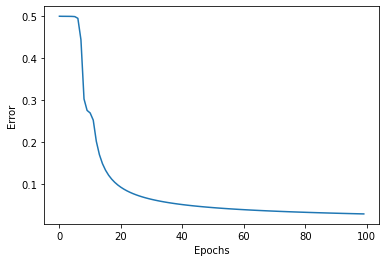

In [376]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(errs)

In [377]:
output_layer

array([[0],
       [1],
       [1],
       [0]])

In [378]:
network_output_layer

array([[0.03558736],
       [0.97473112],
       [0.97333739],
       [0.02459807]])

In [379]:
 weights0

array([[  6.84116856,   0.86837679,   5.49830464],
       [  6.56575737,  -0.55870559, -11.24059148]])

In [380]:
weights1

array([[ 16.30708378],
       [-34.71712021],
       [ 11.81096698]])

In [381]:
def calculate_output(instance):
    hidden_layer = sigmoid(np.dot(instance, weights0))
    output_layer = sigmoid(np.dot(hidden_layer, weights1))
    return output_layer[0]

In [382]:
np.round(calculate_output(np.array([0,0])))

0.0

In [383]:
np.round(calculate_output(np.array([0,1])))

1.0

In [384]:
np.round(calculate_output(np.array([1,0])))

1.0

In [385]:
np.round(calculate_output(np.array([1,1])))

0.0